# **Fake news classification using Machine Learning**
The phenomenon of Fake news is experiencing a
rapid and growing progress with the evolution of the means
of communication and Social media. Fake news detection is an
emerging research area which is gaining big interest. It faces
however some challenges due to the limited resources such as
datasets and processing and analysing techniques.
In this work, we propose a system for Fake news detection
that uses machine learning techniques. We used term frequency inverse document frequency (TF-IDF) of bag of words and
n-grams as feature extraction technique, and Support Vector
Machine (SVM) as a classifier. We propose also a dataset of fake
and true news to train the proposed system. Obtained results
show the efficiency of the system.

# **Data Pre-processing**

**Importing required libraries**

In [1]:
#Data Pre-processing
import numpy as np 
import pandas as pd


#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

#Handling Warnings
import warnings
warnings.filterwarnings('ignore')

#Text pre-processing
import string
string.punctuation
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
real['real/fake'] = 'Real'
real.head()

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [3]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
fake['real/fake'] = 'Fake'
fake.head()

,title,text,subject,date,real/fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


**Merging both the dataset**

In [4]:
data = pd.concat([real,fake],ignore_index=True)
display(data.head())
display(data.tail())

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


,title,text,subject,date,real/fake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   real/fake  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
data.shape

(44898, 5)

In [7]:
data.columns

Index(['title', 'text', 'subject', 'date', 'real/fake'], dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=44898, step=1)

In [9]:
data.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

**Dropping unwanted columns**

In [10]:
data.drop(['date','subject'],axis=1,inplace=True)
data.head()

,title,text,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real


In [11]:
data.rename(columns={'title':'headings'},inplace=True)    
data.head()

,headings,text,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real


**Finding out duplicat rows and then removing them**

In [12]:
data.duplicated().sum()

5793

In [13]:
data.drop_duplicates(inplace=True)
data.shape

(39105, 3)

In [14]:
print(data['real/fake'].value_counts())
fig = px.histogram(data,x=data['real/fake'],color="real/fake",text_auto=True,color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title="real/fake count",xaxis_title="real/fake",yaxis_title="Count")
fig.show()

Real    21197
Fake    17908
Name: real/fake, dtype: int64


# **Text Pre-processing**

**Removing punctuation**
* In this step all the punctuations from the text are removed. 
* string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [15]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
data[['headings','text']] = data[['headings','text']].applymap(lambda x:remove_punctuation(x))
data.head()

,headings,text,real/fake
0,As US budget fight looms Republicans flip thei...,WASHINGTON Reuters The head of a conservative...,Real
1,US military to accept transgender recruits on ...,WASHINGTON Reuters Transgender people will be...,Real
2,Senior US Republican senator Let Mr Mueller do...,WASHINGTON Reuters The special counsel invest...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON Reuters Trump campaign adviser Geo...,Real
4,Trump wants Postal Service to charge much more...,SEATTLEWASHINGTON Reuters President Donald Tr...,Real


**Lowering the text**
* It is one of the most common text preprocessing Python steps where the text is converted into the same case preferably lower case. 
* But it is not necessary to do this step every time you are working on an NLP problem as for some problems lower casing can lead to loss of information.

In [16]:
data[['headings','text']] = data[['headings','text']].applymap(lambda x:x.lower())
data.head()

,headings,text,real/fake
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,Real
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,Real
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,Real
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,Real
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,Real


**Tokenization**
* In this step, the text is split into smaller units. 
* We can use either sentence tokenization or word tokenization based on our problem statement.

In [17]:
def tokenization(text1):
    tokens = re.split('\s+',''.join(text1))
    return tokens
data[['headings','text']] = data[['headings','text']].applymap(lambda x:tokenization(x))
data.head()

,headings,text,real/fake
0,"[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, the, head, of, a, conser...",Real
1,"[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, wil...",Real
2,"[senior, us, republican, senator, let, mr, mue...","[washington, reuters, the, special, counsel, i...",Real
3,"[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser...",Real
4,"[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald...",Real


**Stop words removal**
* Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.
*NLTK library consists of a list of words that are considered stopwords for the English language. Some of them are : [i, me, my, myself, we, our, ours, ourselves, you, you’re, you’ve, you’ll, you’d, your, yours, yourself, yourselves, he, most, other, some, such, no, nor, not, only, own, same, so, then, too, very, s, t, can, will, just, don, don’t, should, should’ve, now, d, ll, m, o, re, ve, y, ain, aren’t, could, couldn’t, didn’t, didn’t]

In [18]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(texts):
    output= [i for i in texts if i not in stopwords]
    return output
data[['headings','text']] = data[['headings','text']].applymap(lambda x:remove_stopwords(x))
data.head()

,headings,text,real/fake
0,"[us, budget, fight, looms, republicans, flip, ...","[washington, reuters, head, conservative, repu...",Real
1,"[us, military, accept, transgender, recruits, ...","[washington, reuters, transgender, people, all...",Real
2,"[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest...",Real
3,"[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser...",Real
4,"[trump, wants, postal, service, charge, much, ...","[seattlewashington, reuters, president, donald...",Real


**Stemming**
* It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  
* For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.



In [19]:
porter_stemmer = PorterStemmer()
def stemming(texts):
    stem_text = [porter_stemmer.stem(word) for word in texts]
    return stem_text
data[['headings','text']] = data[['headings','text']].applymap(lambda x: stemming(x))
data.head()

,headings,text,real/fake
0,"[us, budget, fight, loom, republican, flip, fi...","[washington, reuter, head, conserv, republican...",Real
1,"[us, militari, accept, transgend, recruit, mon...","[washington, reuter, transgend, peopl, allow, ...",Real
2,"[senior, us, republican, senat, let, mr, muell...","[washington, reuter, special, counsel, investi...",Real
3,"[fbi, russia, probe, help, australian, diploma...","[washington, reuter, trump, campaign, advis, g...",Real
4,"[trump, want, postal, servic, charg, much, ama...","[seattlewashington, reuter, presid, donald, tr...",Real


**Merging columns**

In [20]:
data['news'] = data['headings'].astype(str)+','+data['text'].astype(str)
data.drop(['headings','text'],axis=1,inplace=True)
data=data.iloc[:,[1,0]]
data['news']=data['news'].map(lambda x:' '.join(re.findall('\w+',x)))
data.head()

,news,real/fake
0,us budget fight loom republican flip fiscal sc...,Real
1,us militari accept transgend recruit monday pe...,Real
2,senior us republican senat let mr mueller job ...,Real
3,fbi russia probe help australian diplomat tipo...,Real
4,trump want postal servic charg much amazon shi...,Real


In [21]:
data.to_csv('fake news cleaned data2.csv')

# **Machine Learning**

In [22]:
new_data = pd.read_csv('/kaggle/working/fake news cleaned data2.csv')

In [23]:
x = new_data['news']
y = new_data['real/fake']

**Train test split**

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [25]:
print('Training:',X_train.shape)
print('Testing:',X_test.shape)

Training: (27373,)
Testing: (11732,)


In [26]:
print('Training:',y_train.shape)
print('Testing:',y_test.shape)

Training: (27373,)
Testing: (11732,)


**Tfidf_Vectorizer**

In [27]:
vectorizer = TfidfVectorizer(min_df=50,max_features=10000)
vector =  vectorizer.fit_transform(X_train)
x_train=vector.toarray()
vector2 = vectorizer.transform(X_test)
x_test=vector2.toarray()

In [28]:
x_train.shape

(27373, 6961)

**GradientBoosting Classifier**

In [29]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(x_train,y_train)
print('Training score:',model3.score(x_train,y_train))
print('Testing score:',model3.score(x_test,y_test))
model3.best_params_

Training score: 1.0
Testing score: 0.9249062393453802


{'n_estimators': 10, 'max_features': 8, 'max_depth': 200, 'learning_rate': 3}

In [30]:
Graident_boost = (model3.score(x_train,y_train),(model3.score(x_test,y_test)))
Graident_boost

(1.0, 0.9249062393453802)

              precision    recall  f1-score   support

        Fake       0.94      0.89      0.92      5392
        Real       0.91      0.95      0.93      6340

    accuracy                           0.92     11732
   macro avg       0.93      0.92      0.92     11732
weighted avg       0.93      0.92      0.92     11732



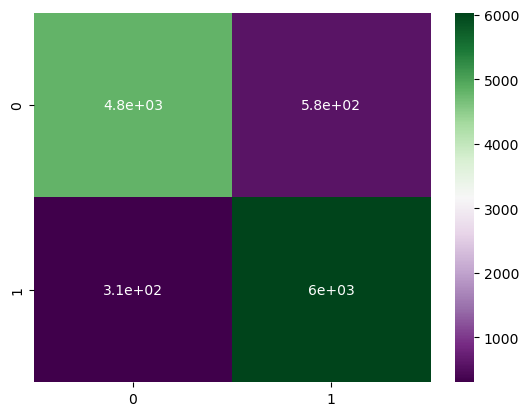

In [31]:
#confusion matrix and classification report
y_act=y_test
y_pred=model3.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

# ***Thankyou***